In [9]:
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
nrdf = pd.read_csv('nrdf.csv', index_col=0)

In [4]:
len(nrdf['speaker'].unique())

56

In [7]:
nrdf.groupby('region')['speaker'].nunique()

region
Atlanta           3
Boston            2
Chicago           2
Cleveland         3
Dallas            4
Kansas City       2
Minneapolis       3
New York          4
Philadelphia      4
Richmond          3
San Francisco     3
St. Louis         2
governor         22
Name: speaker, dtype: int64

In [24]:
nrdf

,date_x,section,speaker,svect,voter,exp,female,region,chair,diffavg,merge_date,date_y,unrate,pceinf,corepceinf
0,1999-02-03,1,boehne,[ 0. 1. 0. 0. ...,1.0,18.016438,0.0,Philadelphia,Greenspan,2.965565,1999-02,1999-02-01,4.4,6.55858,1.22177
1,1999-02-03,1,broaddus,[ 0. 0.22751638 0.2874049 -0.325673...,0.0,6.093151,0.0,Richmond,Greenspan,2.992641,1999-02,1999-02-01,4.4,6.55858,1.22177
2,1999-02-03,1,ferguson,[ 0. 0. -0.37040359 0. ...,1.0,1.246575,0.0,governor,Greenspan,2.651676,1999-02,1999-02-01,4.4,6.55858,1.22177
3,1999-02-03,1,gramlich,[ 0. -0.61315077 0. 0. ...,1.0,1.246575,0.0,governor,Greenspan,4.650914,1999-02,1999-02-01,4.4,6.55858,1.22177
4,1999-02-03,1,greenspan,[ 0. 0. 0. 0. ...,1.0,11.490411,0.0,governor,Greenspan,1.918389,1999-02,1999-02-01,4.4,6.55858,1.22177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,2017-12-13,2,powell,[ 0. 0. 3.24953063 0. ...,1.0,5.556164,0.0,governor,Yellen,1.687786,2017-12,2017-12-01,4.1,5.07616,1.57688
4657,2017-12-13,2,quarles,[0.26322263 0. 3.97897664 0. 0...,1.0,0.238356,0.0,governor,Yellen,2.460575,2017-12,2017-12-01,4.1,5.07616,1.57688
4658,2017-12-13,2,rosengren,[ 0.3725851 0. 0.37957125 0. ...,0.0,10.408219,0.0,Boston,Yellen,1.986754,2017-12,2017-12-01,4.1,5.07616,1.57688
4659,2017-12-13,2,williams,[ 0.43648208 0.37931034 3.77248189 0. ...,0.0,6.791781,0.0,San Francisco,Yellen,2.514672,2017-12,2017-12-01,4.1,5.07616,1.57688


/tmp/ipykernel_37186/1156699918.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_fem['date'] = pd.to_datetime(gdf_fem['date_x'])
/tmp/ipykernel_37186/1156699918.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_fem['prop_fem'] = gdf_fem['count'] / gdf_fem['total']


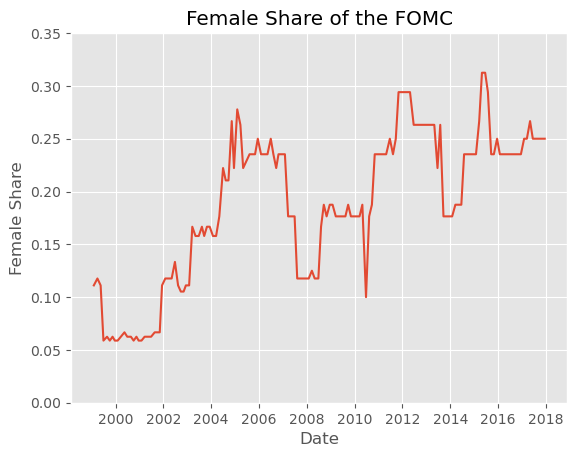

In [17]:
gdf = nrdf.loc[nrdf['section'] == 1, ['date_x', 'female', 'speaker']].groupby(['date_x', 'female']).agg(count=('speaker', 'count')).reset_index()
# pivoted = gdf.pivot(index='date_x', columns='female', values='count').reset_index()
plt.style.use('ggplot')
# pivoted
gdf['total'] = gdf.groupby('date_x')['count'].transform('sum')
gdf_fem = gdf[gdf['female'] == 1]
gdf_fem['date'] = pd.to_datetime(gdf_fem['date_x'])
gdf_fem['prop_fem'] = gdf_fem['count'] / gdf_fem['total']

fig, ax = plt.subplots()
ax.set_ylim([0,0.35])
ax.set_title('Female Share of the FOMC')
ax.set_ylabel('Female Share')
ax.set_xlabel('Date')
ax.plot(gdf_fem['date'], gdf_fem['prop_fem'])

plt.savefig('output.png')

In [18]:
expdf = nrdf.groupby('date_x', as_index=False).agg({'exp': ['min', 'max', 'median']})
expdf.columns = ["_".join(col_name).rstrip("_") for col_name in expdf.columns]

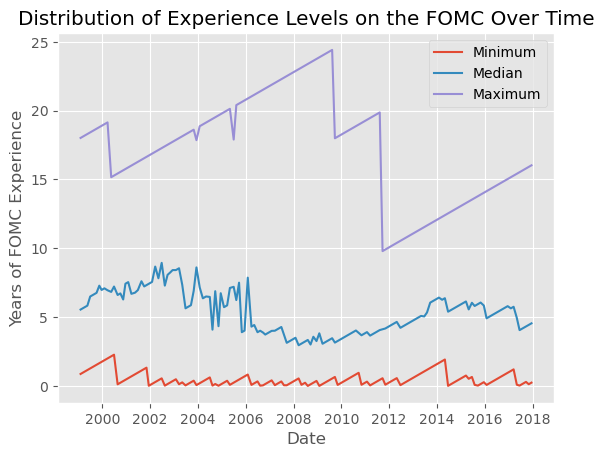

In [27]:
expdf
fig, ax = plt.subplots()
expdf['date'] = pd.to_datetime(expdf['date_x'])
ax.plot(expdf['date'], expdf['exp_min'], label='Minimum')
ax.plot(expdf['date'], expdf['exp_median'], label='Median')
ax.plot(expdf['date'], expdf['exp_max'], label='Maximum')

ax.set_ylabel('Years of FOMC Experience')
ax.set_xlabel('Date')

ax.set_title('Distribution of Experience Levels on the FOMC Over Time')

ax.legend()

plt.savefig('experience_dist.png')